### Importing neccesary libraries of Python

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Import the loan dataset into dataframe

In [133]:
loan_ds = pd.read_csv('loan.csv',low_memory=False)

### Displaying first five rows of the dataset to see the data

In [134]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(loan_ds.head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Checking the shape to know about number of rows and columns in the loan dataset

In [135]:
loan_ds.shape

(39717, 111)

In [136]:
loan_ds.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### There are so many columns having all values Null so these columns are of no use so better to remove these columns.

In [137]:
loan_ds.dropna(axis=1, how='all', inplace=True)

In [138]:
loan_ds.shape

(39717, 57)

### Now we have percentage wise Null Values in remaining Columns
- Some of the columns having more than 90% Null Values
- So better to remove those columns as well, as they are no use

- **mths_since_last_record** (92%)
- **next_pymnt_d** (97%)

In [139]:
loan_ds.isna().sum()*100/len(loan_ds)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


### Removing columns having more than 90% values as NaN

In [140]:
loan_ds = loan_ds.loc[:,loan_ds.isna().sum() < len(loan_ds)*.9]

In [141]:
loan_ds.shape

(39717, 55)

### Some columns having same values or we can say Constant value 
- So we can not get any insight from those columns.
- Better to drop those columns as well.
- **'initial_list_status'**,**'collections_12_mths_ex_med'**,**'policy_code'**,**'application_type'**,
- **'acc_now_delinq'**,**'delinq_amnt'**,**'chargeoff_within_12_mths'**,**'tax_liens'**

In [142]:
loan_ds.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type',
              'acc_now_delinq','delinq_amnt','chargeoff_within_12_mths','tax_liens','total_acc'], 
             axis = 1, inplace=True)

In [143]:
loan_ds.shape

(39717, 45)

### We have some columns which don't have any impact on target variable, so we can drop those columns as well
- **'id'**,**'member_id'**,**'url'**,**'desc'**

In [144]:
loan_ds.drop(['id','member_id','url','desc'], axis=1, inplace=True)

In [145]:
loan_ds.shape

(39717, 41)

### Some columns which by analysing we got idea that these have no impact on target variable (loan status)
- Means these columns have {**customer**} data after getting loan,
- And our problem statement is to decide whether a customer is able to get loan or not
- So better to drop those columns.
- These variables are called **Customer Behaviour Variables**

In [146]:
loan_ds.drop(['mths_since_last_delinq','out_prncp','out_prncp_inv','recoveries','open_acc','earliest_cr_line',
             'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','total_pymnt','total_pymnt_inv','delinq_2yrs',
             'total_rec_prncp','total_rec_int','total_rec_late_fee','revol_bal','revol_util','last_credit_pull_d'],
            axis=1, inplace=True)

In [147]:
loan_ds.shape

(39717, 23)

### By doing further analysis on Loan dataset we found that there are three columns of Amount that is 
- a) Loan amount 
- b) Funded amount 
- c) Funded amount by Investor

### Which are almost same for this analysis, So we are going to drop two columns 
- 1) Funded amount 
- 2) Funded amount by Investor

In [148]:
loan_ds.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

In [149]:
loan_ds.shape

(39717, 21)

# DATA IMPUTATION

### Remove " month" from "term" column for any numeric operation and convert datatype into integer

In [150]:
loan_ds.term = loan_ds.term.apply(lambda x : int(x.replace(' months','')))

### To verify the above step

In [151]:
loan_ds.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

In [152]:
loan_ds.term.dtypes

dtype('int64')

### Remove "%" from interest rate column

In [153]:
loan_ds.int_rate = loan_ds.int_rate.apply(lambda x : float(x.strip('%')))

### To verify the above step

In [154]:
loan_ds.int_rate.value_counts().head()


10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
Name: int_rate, dtype: int64

### There is one more column {Employee Length} which need to be clean for any numeric operation

In [155]:
loan_ds.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

### We have created one function to remove unwanted String from column
- Function name : **empExp(emp_length)**

In [156]:
def empExp(emp_length):
    if pd.isna(emp_length):
        return emp_length
    if "+ years" in emp_length:
        emp_length = emp_length.replace('+ years','').strip()
        return emp_length
    elif "<" in emp_length:
        emp_length = emp_length.replace('<','').strip()
        emp_length = emp_length.replace('year','').strip()
        return emp_length
    elif "year" in emp_length or "years" in emp_length:
        emp_length = emp_length.replace('years','').strip()
        emp_length = emp_length.replace('year','').strip()
        return emp_length
    else:
        return emp_length

In [157]:
loan_ds.emp_length = list(map(empExp, loan_ds['emp_length']))

In [158]:
loan_ds['emp_length'] = loan_ds['emp_length'].astype(float)
loan_ds.emp_length.dtypes

dtype('float64')

In [159]:
loan_ds['emp_length'].describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [160]:
loan_ds['emp_length_buc'] = pd.cut(x = loan_ds.emp_length, bins=[0,2,4,9,10],
                                  labels=['0-2', '3-4', '5-9', '10+'])

In [161]:
loan_ds.emp_length_buc.head()

0    10+
1    0-2
2    10+
3    10+
4    0-2
Name: emp_length_buc, dtype: category
Categories (4, object): ['0-2' < '3-4' < '5-9' < '10+']

# DERIVED METRICS

### We also have used derived metrics concept here
- We have one column which denotes the date data
- a) **issue_d**

### Now we can derive two new columns from this column
- 1) **issued_month**
- 2) **issued_year**

In [162]:
loan_ds['issued_year'] = pd.DatetimeIndex(loan_ds.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).year

In [163]:
loan_ds['issued_month'] = pd.DatetimeIndex(loan_ds.issue_d.apply(lambda x : datetime.strptime(x, '%b-%y'))).month

### Verifying new derived columns

In [164]:
loan_ds['issued_year'].unique()

array([2011, 2010, 2009, 2008, 2007])

In [165]:
loan_ds['issued_month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## Data Duplicacy

### In emp_title column we found : 
- Some data is not properly feeded, which creates duplicate data
- For example 'US Army'
- We have duplicate data for **US Army**
- Example **U.S. Army**, **US ARMY**, **United States Army** and **us army** etc
- So we can correct this type of data to get correct frequency of data

In [166]:
loan_ds.emp_title.value_counts().head(10)

US Army              134
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Wells Fargo           54
USAF                  54
UPS                   53
US Air Force          52
Walmart               45
Name: emp_title, dtype: int64

In [167]:
loan_ds[loan_ds.emp_title.isin(['US Army','U.S. Army','US ARMY','United States Army','us army'])].head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,inq_last_6mths,pub_rec,pub_rec_bankruptcies,emp_length_buc,issued_year,issued_month
160,16000,60,15.27,382.92,C,C4,US Army,10.0,RENT,42656.40,Source Verified,Dec-11,Fully Paid,debt_consolidation,debt consolidation,305xx,GA,17.44,1,0,0.0,10+,2011,12
347,16000,60,19.03,301.76,E,E2,US Army,8.0,MORTGAGE,54000.00,Source Verified,Dec-11,Fully Paid,home_improvement,Home Improvement Loan,283xx,NC,16.89,0,0,0.0,5-9,2011,12
670,25000,60,19.03,416.62,E,E2,U.S. Army,10.0,RENT,50400.00,Verified,Dec-11,Fully Paid,debt_consolidation,Debt Loan,313xx,GA,20.67,0,0,0.0,10+,2011,12
1014,35000,60,19.03,586.63,E,E2,US Army,10.0,MORTGAGE,99224.88,Verified,Dec-11,Fully Paid,home_improvement,Swimming Pool,283xx,NC,12.07,2,0,0.0,10+,2011,12
1089,10050,60,17.27,251.23,D,D3,U.S. Army,10.0,MORTGAGE,74143.68,Source Verified,Dec-11,Charged Off,home_improvement,Home Improvement Loan,664xx,KS,17.54,1,0,0.0,10+,2011,12
1185,4200,36,13.49,142.51,C,C1,U.S. Army,6.0,RENT,55044.48,Source Verified,Dec-11,Fully Paid,moving,Moving Loan,611xx,IL,8.74,3,0,0.0,5-9,2011,12
1234,8400,36,7.51,261.34,A,A3,US Army,10.0,RENT,72000.00,Source Verified,Dec-11,Charged Off,debt_consolidation,Debts paid,995xx,AK,20.75,2,0,0.0,10+,2011,12
1325,9000,36,14.27,308.79,C,C2,US Army,2.0,RENT,40000.00,Source Verified,Dec-11,Fully Paid,debt_consolidation,Credit Card Consolidation,240xx,VA,15.93,0,0,0.0,0-2,2011,12
1450,10000,36,18.25,362.78,D,D5,US Army,3.0,RENT,42910.00,Source Verified,Dec-11,Fully Paid,other,My Personal Loan,923xx,CA,20.64,1,0,0.0,3-4,2011,12
1466,6500,36,8.90,206.40,A,A5,US Army,9.0,MORTGAGE,38000.00,Verified,Dec-11,Fully Paid,credit_card,Credit Card Loan,313xx,GA,26.68,1,0,0.0,5-9,2011,12


### We have created function to correct the above data
- Function Name : **checkForUSArmy(empTitle)**

In [168]:
def checkForUSArmy(empTitle):
    if empTitle == 'U.S. Army' or empTitle == 'US ARMY' or empTitle == "United States Army" or empTitle == 'us army':
        empTitle = 'US Army'
    return empTitle

In [169]:
loan_ds.emp_title = list(map(checkForUSArmy, loan_ds['emp_title']))

In [170]:
loan_ds.emp_title.value_counts().head(10)

US Army              277
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Wells Fargo           54
USAF                  54
UPS                   53
US Air Force          52
Walmart               45
Name: emp_title, dtype: int64

### There are other values as well in Employee Title which is duplicate,
- So we did this for one more Value
- **Self Employed** 
- duplicate data : **Self**, **self**, **Self-employed**, **Self-Employed**
- Function Name : **checkForSelfEmployed(empTitle)**

In [171]:
def checkForSelfEmployed(empTitle):
    if empTitle == 'Self' or empTitle == 'self' or empTitle == "Self-employed" or empTitle == 'Self-Employed':
        empTitle = 'Self Employed'
    return empTitle

In [172]:
loan_ds.emp_title = list(map(checkForSelfEmployed, loan_ds['emp_title']))

In [173]:
loan_ds.emp_title.value_counts().head(10)

US Army              277
Self Employed        127
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
USAF                  54
Wells Fargo           54
UPS                   53
US Air Force          52
Name: emp_title, dtype: int64

### Now we have almost corrected the loan dataset
- We can check now for NaN values if there are any

### To check percentage of Null values in each column, We have:
- 1) **emp_title**
- 2) **emp_length**
- 3) **title**
- 4) **pub_rec_bankruptcies**

In [174]:
loan_ds.isnull().sum()*100/len(loan_ds)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
inq_last_6mths          0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    1.754916
emp_length_buc          2.706650
issued_year             0.000000
issued_month            0.000000
dtype: float64

### Suggestions for Imputing missing values for Null/NaN columns

### First we have picked :
- **title** as it has less null values as compare to others

In [175]:
loan_ds[loan_ds.title.isnull()].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,inq_last_6mths,pub_rec,pub_rec_bankruptcies,emp_length_buc,issued_year,issued_month
25188,8000,36,19.79,296.46,F,F5,Palm Beach County Sheriff's Office,1.0,RENT,41000.0,Source Verified,Sep-10,Fully Paid,other,NaN,333xx,FL,3.40,1,0,0.0,0-2,2010,9
27477,20000,60,16.32,489.77,D,D5,Charles Schwab,5.0,OWN,68000.0,Source Verified,Jul-10,Fully Paid,credit_card,NaN,852xx,AZ,5.93,2,0,0.0,5-9,2010,7
28469,13750,60,16.32,336.72,D,D5,Dbl Labs,4.0,OWN,30000.0,Source Verified,Jul-10,Fully Paid,other,NaN,563xx,MN,18.84,1,0,0.0,3-4,2010,7
28700,10000,60,11.49,219.88,B,B4,NaN,NaN,MORTGAGE,73200.0,Not Verified,Jun-10,Charged Off,small_business,NaN,446xx,OH,14.56,4,0,0.0,NaN,2010,6
28710,1800,36,14.84,62.26,D,D1,Fresh Produce Sportswear,6.0,OWN,30000.0,Not Verified,Jun-10,Fully Paid,debt_consolidation,NaN,926xx,CA,7.72,0,0,0.0,5-9,2010,6


### For "title" column we have below suggestion:
- Because it's a categorical variable so we can not get **'mean'**/**'median'** for this variable.
- So we can try the **mode()** metrics to get most present value


- 1) We can replace NaN value with **'Debt Consolidation'** which we got using mode() metrics.
- 2) We can also replace NaN values with their corresponding **'purpose'** column values.

In [176]:
loan_ds.title.mode()

0    Debt Consolidation
Name: title, dtype: object

### For "emp_title" column we have below suggestion:
- Because it's a categorical variable so we can't get **'mean'**/**'median'** for this variable.
- We can replace NaN value with **'US Army'** as mode() metrics result this value.

In [177]:
loan_ds.emp_title.mode()

0    US Army
Name: emp_title, dtype: object

### For "emp_length" column we have below suggestion:
- We can replace NaN value with **"mean/median"** values
- Because there is no outlier

In [178]:
loan_ds.emp_length.median()

4.0

### For "pub_rec_bankruptcies" column we have below suggestion:
- We can replace NaN value with **"0.0"** which we got using mode() metrics.

In [179]:
loan_ds.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [180]:
loan_ds.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### Now come to our Target variable : loan_status
- It has 3 categories
    - **Fully Charged** - those who have fully paid there loan amount
    - **Current** - those who are paying there loan amount in present
    - **Charged off** - those who are not paying there loan amount, so became defaulter

### So from above types of loan status :
- For customers who are currently paying there loan amount we cann't decide the exact status of those,
  So better to drop the rows whose loan status is showing **Current**

In [181]:
loan_ds = loan_ds[loan_ds['loan_status'] != 'Current']

In [182]:
loan_ds.loan_status = loan_ds.loan_status.apply(lambda x : 0 if x == 'Fully Paid' else 1)

In [183]:
loan_ds.loan_status.value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

## UNIVARIATE ANALYSIS :

### From the below graph of Loan Amount : 
- Most Customers took loan for amount (5000, 10000, 12000, 15000, 20000, 25000)
- As there are high raises for these amounts as per the graph

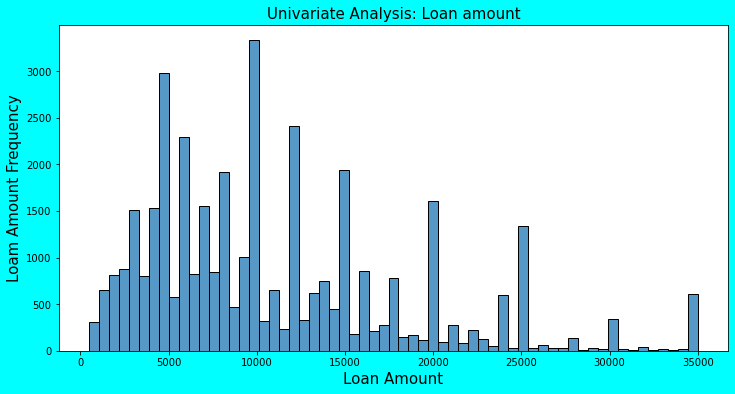

In [184]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Loan amount', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x = loan_ds.loan_amnt)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount', fontdict=xy_fontdict)
plt.ylabel('Loam Amount Frequency', fontdict=xy_fontdict)
plt.show()

### We can also create bucket of loan amount and then try to plot graph
- Maximum number of customers come under **(5501 - 10000)** bucket category

In [185]:
loan_ds.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [186]:
loan_ds['loan_amnt_buc'] = pd.cut(x = loan_ds.loan_amnt, bins=[0,5500,10000,15000,35000],
                                  labels=['0-5500','5501-10000','10001-15000', '15001+'])

In [187]:
loan_ds.loan_amnt_buc.value_counts()

5501-10000     12246
0-5500         10028
15001+          8620
10001-15000     7683
Name: loan_amnt_buc, dtype: int64

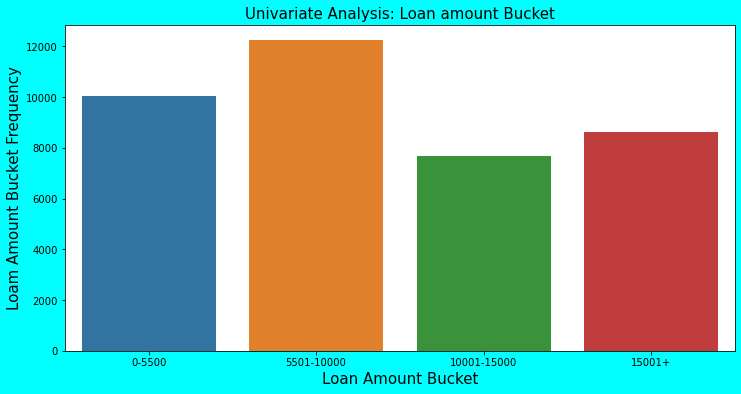

In [188]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Loan amount Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.loan_amnt_buc)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount Bucket', fontdict=xy_fontdict)
plt.ylabel('Loam Amount Bucket Frequency', fontdict=xy_fontdict)
plt.show()

### If we do univariate analysis for Term then we got the outcome:
- Number of customers are higher who take loan for minimum duration (here 36 months)

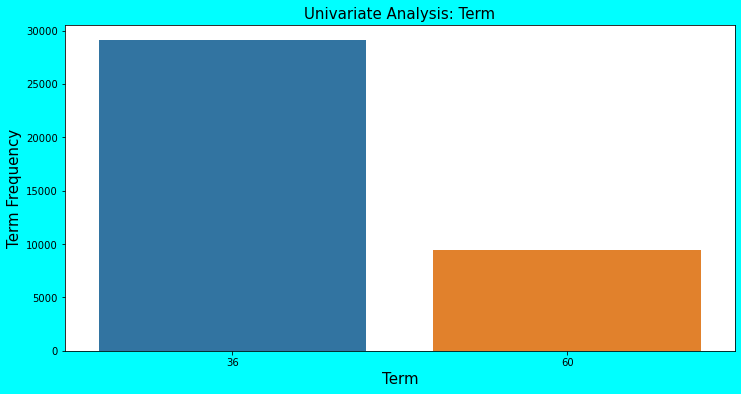

In [189]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Term', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x = loan_ds.term)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Term', fontdict=xy_fontdict)
plt.ylabel('Term Frequency', fontdict=xy_fontdict)
plt.show()

### From the below graphs of Interest rate 
- In histplot, there are high raises between 5 to 15
- So we can say that most of the customers took loan upto 15%

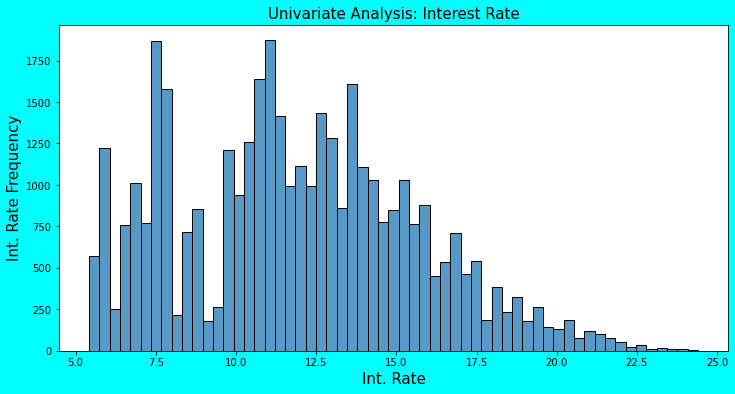

In [190]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Interest Rate', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=loan_ds.int_rate)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Int. Rate', fontdict=xy_fontdict)
plt.ylabel('Int. Rate Frequency', fontdict=xy_fontdict)
plt.show()

### If we plot BoxPlot for Interest Rate :
- 50% customers take loan upto 11 or 12%
- 25% to 75% quartile lies between 8 to 15%
- Upper Extereme is upto 22.5% and after this rest are outliers

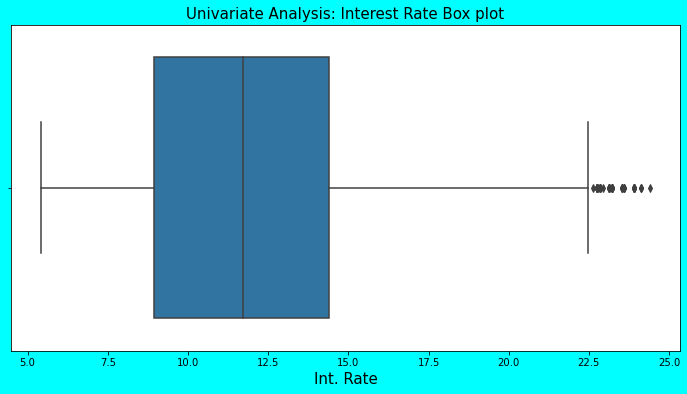

In [191]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Interest Rate Box plot',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.boxplot(x=loan_ds.int_rate)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Int. Rate', fontdict=xy_fontdict)
plt.show()

### We can also create bucket of the Interest Rate  
- [(0-9), (10-12), (13-15) and (16+)]

### Plotting a graph by Countplot  we have :
- Most of the customers took loan at average interest rate that is between 10 to 12
- Same we can relate with the above boxplot

In [192]:
loan_ds.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [193]:
loan_ds['int_rate_buc'] = pd.cut(x = loan_ds.int_rate, bins=[0,9,12,15,25],labels=['0-9','10-12','13-15','16+'])

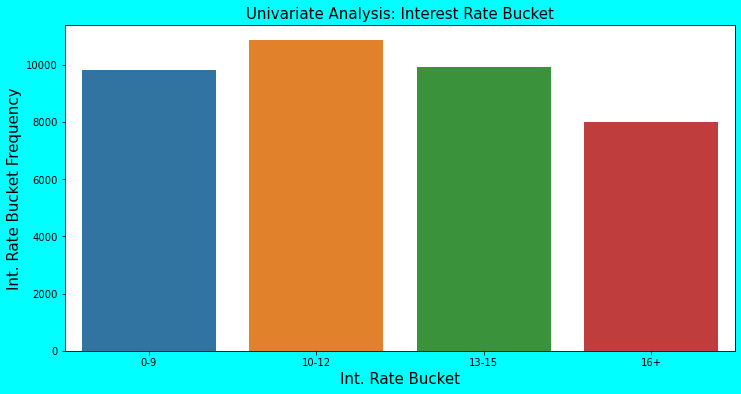

In [194]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Interest Rate Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x = loan_ds.int_rate_buc)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Int. Rate Bucket', fontdict=xy_fontdict)
plt.ylabel('Int. Rate Bucket Frequency', fontdict=xy_fontdict)
plt.show()

In [195]:
loan_ds.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

### We have plotted three different graph for Installment
- In **histplot**, 
    - High raises are near 200 
    - Frequency goes down as installment amount increases
- In **boxplot**,
    - Upper streme is upto 800
    - IQR range lies between 200 to 400
    - Above 800 almost we have outliers
- In **Countplot**, which we can create from the existing **installment** column
    - Most of the customers comes under Installment bucket 
        - (0 - 170)
        - (251 - 450)

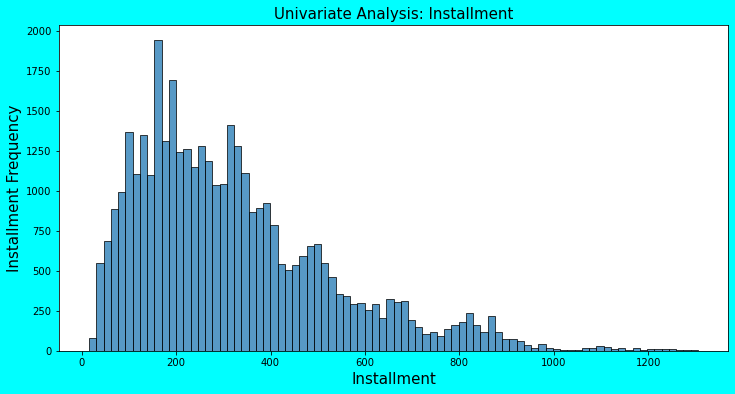

In [196]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Installment', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=loan_ds.installment)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Installment', fontdict=xy_fontdict)
plt.ylabel('Installment Frequency', fontdict=xy_fontdict)
plt.show()

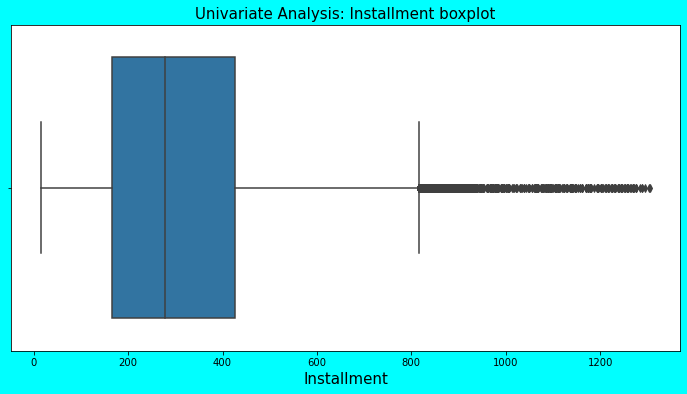

In [197]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Installment boxplot',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.boxplot(x=loan_ds.installment)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Installment', fontdict=xy_fontdict)
plt.show()

In [198]:
loan_ds['installment_buc'] = pd.cut(x = loan_ds.installment, bins=[0,170,280,450,1400], 
                                    labels=['0-170','171-280','281-450','451+'])

In [199]:
loan_ds.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

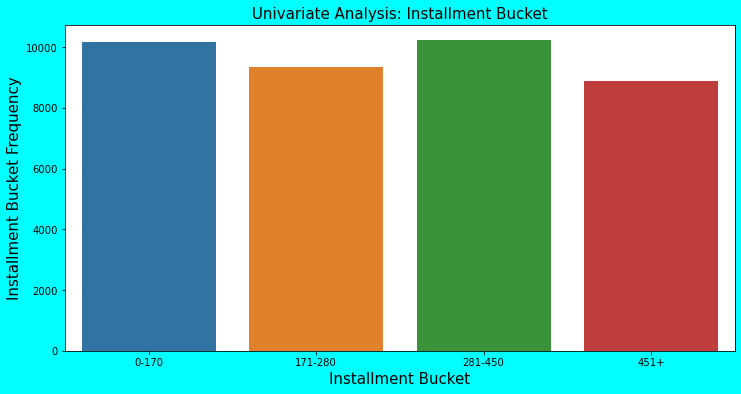

In [200]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Installment Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x = loan_ds.installment_buc)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Installment Bucket', fontdict=xy_fontdict)
plt.ylabel('Installment Bucket Frequency', fontdict=xy_fontdict)
plt.show()

### For grade variable:
- We plotted countplot graph,
    - Almost clear that as we move from **A** to **G**, numbers of customers per grade decreases

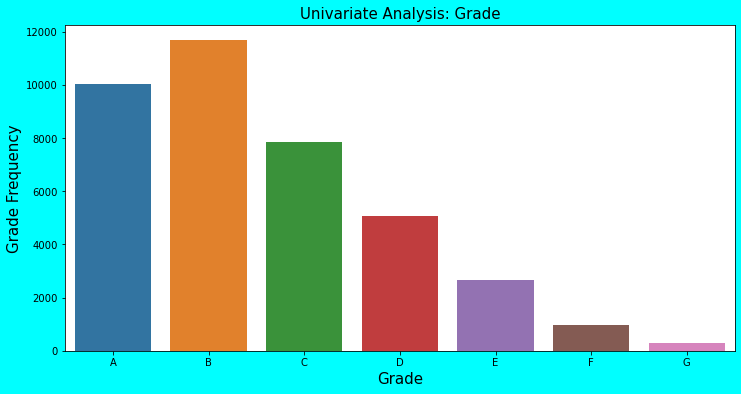

In [201]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Grade', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x = loan_ds.grade.sort_values())
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Grade', fontdict=xy_fontdict)
plt.ylabel('Grade Frequency', fontdict=xy_fontdict)
plt.show()

### For Sub grade:
- We have plotted histplot:
    - From which we can get information that high raises are mostly for **A** and **B** grades
    - Means as **A** and **B** grades considered to be best

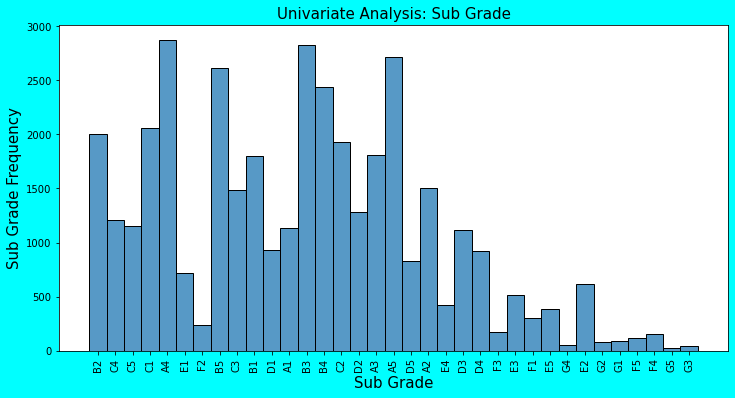

In [202]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Sub Grade', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=loan_ds.sub_grade)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Sub Grade', fontdict=xy_fontdict)
plt.ylabel('Sub Grade Frequency', fontdict=xy_fontdict)
plt.xticks(rotation=90)
plt.show()

### For Title column:
- We have found duplicate data in Title column
- Some of them we fixed which are on top
- Like **DebtConsolidationLoan**, **PersonalLoan**, **ConsolidationLoan**, **HomeImprovement**, **CreditCardConsolidation**, **SmallBusiness**
- Now we took top 10 titles for further anaysis
    - From which clearly shows that most of the loan is taken for **Debt Consolidation**

In [203]:
debt_con_li = ['Debt Consolidation Loan','debt consolidation','Debt consolidation','debt_consolidation',
               'Debt Consolidation','DEBT CONSOLIDATION','debt consolidation loan','Debt consolidation loan',
               'Debt Consolodation','Debt Consolidation loan','Debt Consolidation loan','debt consolidation',
               'Debt Consolidate','Debt consolidation loan','Debt consolidation','Dept Consolidation',
               'Debt Consol','DebtConsolidation','My Debt Consolidation Loan','Debt Consolidation Loan',
               'debt_consolidation loan','Debt Cons','Debt Consolidation loan','Debt consolidation loan',
              'Debt Consolidation Loan']

In [204]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Debt Consolidation' if x in debt_con_li else x)

In [205]:
personal_li = ['Personal','personal loan','personal','Personal loan','PERSONAL LOAN','My Personal Loan',
              'Personal Loan','Personal','PERSONAL','personal','personal loan','My personal loan',
              'my personal loan','PersonalLoan']

In [206]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Personal Loan' if x in personal_li else x)

In [207]:
Consolidation_li = ['Consolidation Loan','consolidation','consolidation loan','Bill Consolidation',
                    'Consolidation loan','Loan Consolidation','Consolidation','bill consolidation',
                   'CONSOLIDATION','Loan consolidation','Bill consolidation','consolidation',
                   'Consolidation Loan','CONSOLIDATION LOAN','2011 Consolidation','loan consolidation',
                   'Consolidation 2010','Consolidation!','LOAN CONSOLIDATION','Lending Club Consolidation Loan']

In [208]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Consolidation' if x in Consolidation_li else x)

In [209]:
cc_console_li = ['Credit Card Loan','Credit Card Payoff','Credit Card Refinance',
                 'Credit Card','Credit Cards','Credit Card Debt Consolidation','credit card consolidation',
                 'CC Consolidation','Credit Card Debt','Credit Consolidation','Credit Card Consolidation Loan',
                 'Credit card consolidation','credit cards','Credit Card Refi','CC Payoff','credit card',
                 'Credit Card Refinancing','Pay off credit cards','CC Refinance','credit card refinance',
                 'Consolidate Credit Card Debt','pay off credit cards','credit card payoff','CC Loan',
                 'Credit card refinance','Credit Card Refinance Loan','Pay Off Credit Cards','Credit Card Pay Off',
                 'credit card loan','Credit cards','Credit Card consolidation','Credit card payoff',
                 'Credit Card Payoff Loan','CC Refi','Consolidate Credit Cards','Paying off credit cards',
                 'credit consolidation','CC','Credit Card loan','Consolidating Credit Card Debt','CC Debt',
                 'Payoff Credit Cards','credit_card','Credit Refinance','credit card refinance loan','credit',
                 'Credit Card payoff','credit card debt','Pay off credit card','credit card pay off',
                 'Credit Card Elimination','Consolidate credit card debt','Credit card loan','Credit Card Repayment',
                 'Credit Debt Consolidation','credit_card Loan','Credit card','CREDIT CARD PAYOFF',
                 'CREDIT CARD CONSOLIDATION','Credit card debt consolidation','Credit Card Consolidation']

In [210]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Credit Card Consolidation' if x in cc_console_li else x)

In [211]:
home_improve_li = ['Home Improvement Loan','home improvement','Home improvement','Home Improvements',
               'home improvements','HOME IMPROVEMENT','home improvement loan','Home improvement loan','Home Repairs',
               'Home_Improvement Loan','Home Improvement loan','Home Improvement','Home Improvement Project',
                'Home Improvment','Home improvements']

In [212]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Home Improvement' if x in home_improve_li else x)

In [213]:
smallbusiness_loan_li = ['Small Business','Small Business loan','Small_Business Loan']

In [214]:
loan_ds.title = loan_ds.title.apply(lambda x : 'Small Business Loan' if x in smallbusiness_loan_li else x)

In [215]:
top10_title = ["Debt Consolidation","Credit Card Consolidation","Personal Loan","Consolidation",'Home Improvement',
              'Small Business Loan','Loan','Wedding Loan','Car Loan','Other Loan']
df_title10 = loan_ds[loan_ds['title'].isin(top10_title)]

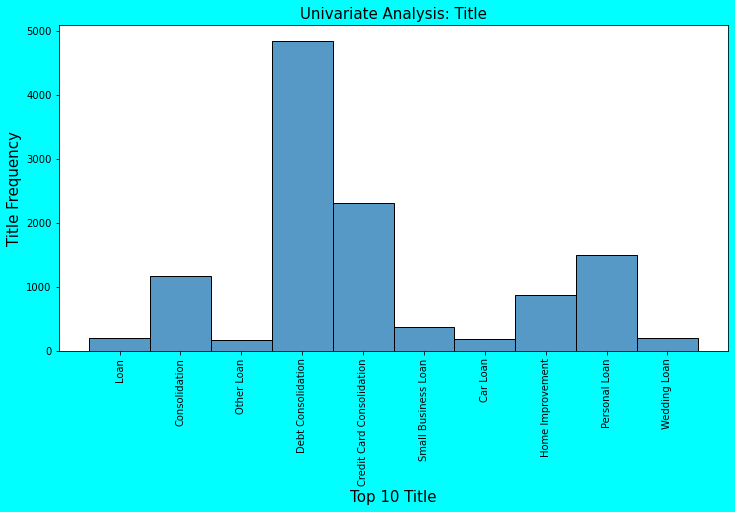

In [216]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Title', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=df_title10.title)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Top 10 Title', fontdict=xy_fontdict)
plt.ylabel('Title Frequency', fontdict=xy_fontdict)
plt.xticks(rotation=90)
plt.show()

### From the below graph some assumptions are as below:
- Peoples having experience under (0 - 2) take loan most often.
- We can say most of the freshers who just started working more ofter apply for loan 

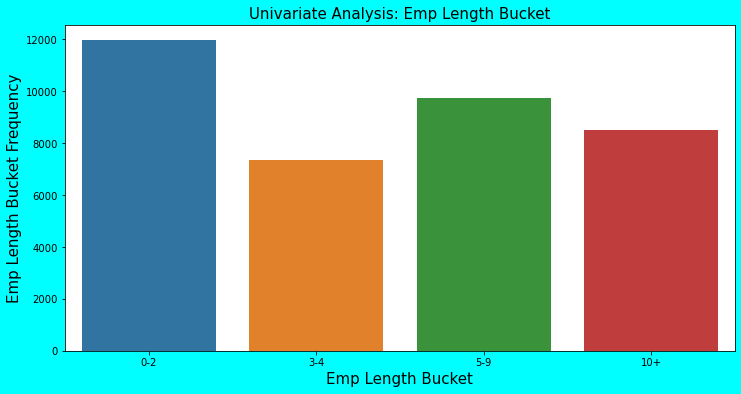

In [217]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Emp Length Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x= loan_ds.emp_length_buc.sort_values())
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Emp Length Bucket', fontdict=xy_fontdict)
plt.ylabel('Emp Length Bucket Frequency', fontdict=xy_fontdict)
plt.show()

### From graph of Home ownership:
- The frequency of Rented and Mortgaged Peoples are high
- Or we can say that peoples who live on **Rented/Mortgage** house are more interested to take loan

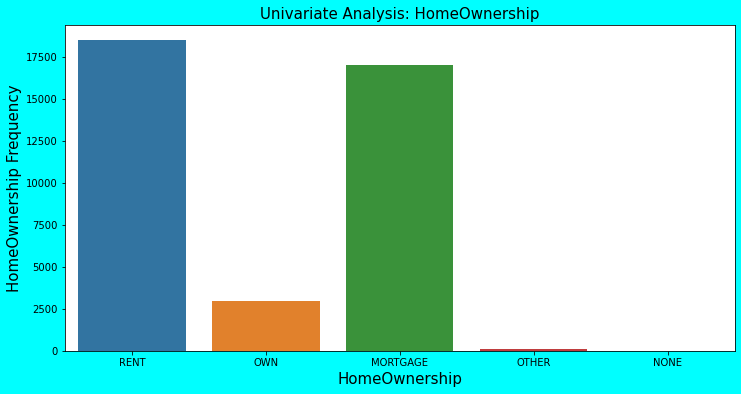

In [218]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: HomeOwnership', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.home_ownership)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('HomeOwnership', fontdict=xy_fontdict)
plt.ylabel('HomeOwnership Frequency', fontdict=xy_fontdict)
plt.show()

### For Annual Income we tried boxplot, but
- We can not get any much insight
- There are too much outliers

### So we decided to create bucket for Annual Income
- And after bucketing we plot countplot
    - Customers who come under category of (40001 - 60000) Annual Income are more interested to take Loan

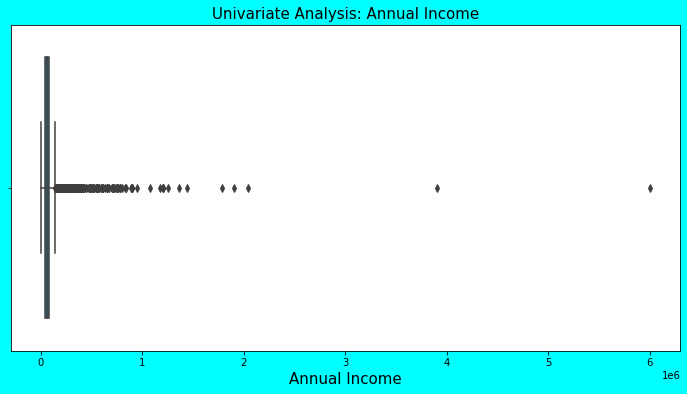

In [219]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Annual Income', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.boxplot(x=loan_ds.annual_inc)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Annual Income', fontdict=xy_fontdict)
plt.show()

In [220]:
loan_ds['annual_inc_buc'] = pd.cut(x= loan_ds.annual_inc, bins=[0,40000,60000,85000,6000000],
                                  labels=['0-40000','40001-60000','60001-85000','85001+'])

In [221]:
loan_ds.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

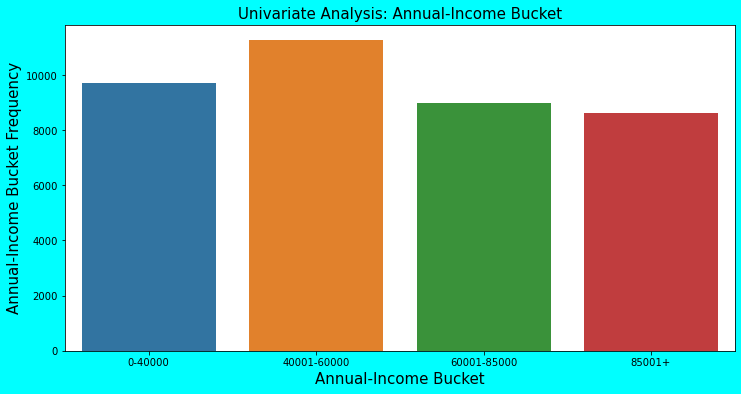

In [222]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Annual-Income Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.annual_inc_buc.sort_values())
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Annual-Income Bucket', fontdict=xy_fontdict)
plt.ylabel('Annual-Income Bucket Frequency', fontdict=xy_fontdict)
plt.show()

### For Verification Status:
- Most of the customer's Income are not verified 
- So it can be a risk to give them loan
- But we can't predict on the basis of univariate analysis of this variable

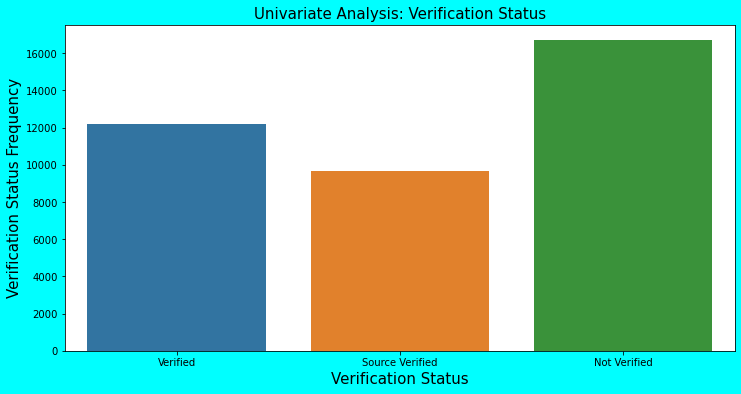

In [223]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Verification Status', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.verification_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Verification Status', fontdict=xy_fontdict)
plt.ylabel('Verification Status Frequency', fontdict=xy_fontdict)
plt.show()

### If we plot graph for Purpose column:
- Most of the customer's purpose is **Debt Consolidation**, 
    - By which we can insight that:
         - Most of the customers having already too much existing debt.So the count is more than others

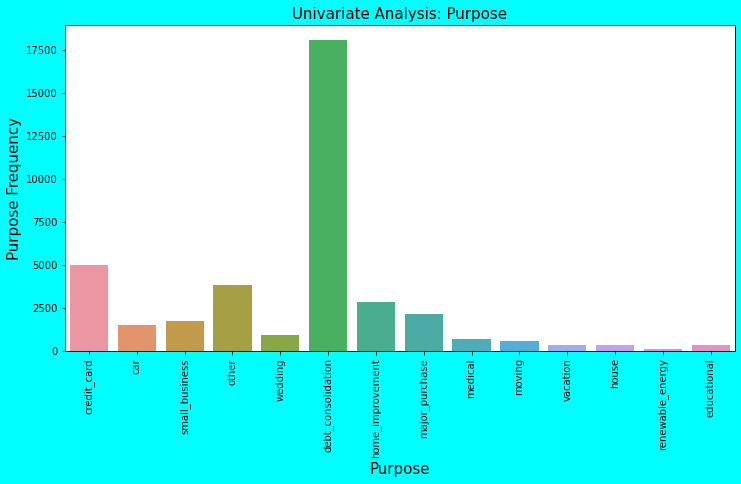

In [224]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Purpose', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.purpose)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Purpose', fontdict=xy_fontdict)
plt.ylabel('Purpose Frequency', fontdict=xy_fontdict)
plt.xticks(rotation =90)
plt.show()

### Plotting graph for Address State :
- Most of the customers are from California State who are interested to take loan

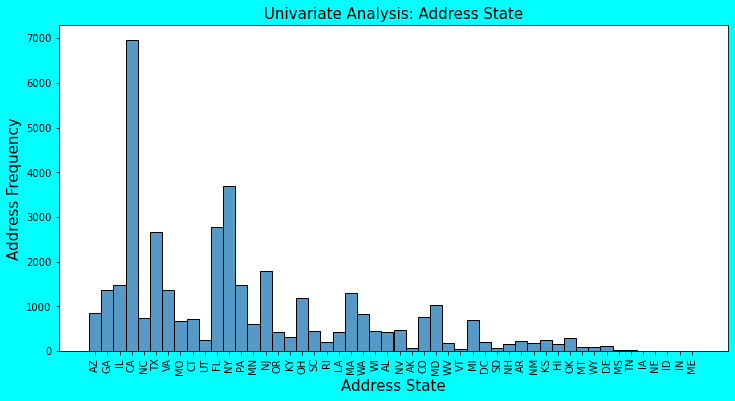

In [225]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Address State', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=loan_ds.addr_state)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Address State', fontdict=xy_fontdict)
plt.ylabel('Address Frequency', fontdict=xy_fontdict)
plt.xticks(rotation=90)
plt.show()

### We have plotted three different graph for dti (Debt-to-Income) ratio
- Debt income ratio is the percentage of a consumer's monthly gross income that goes towards paying debts. 
- That means when annual income is low DTI is high & vice versa.

- In **histplot**, 
    - High raises are near 15% 
- In **boxplot**,
    - Upper streme is upto 30%
    - Mean that is 50% is around 14%
    - 25% and 75% is around 8% and 19%
    - No outliers
- In **Countplot**, which we can create from the existing **dti** column
    - Most of the customers comes under average dti bucket (0 to 9)

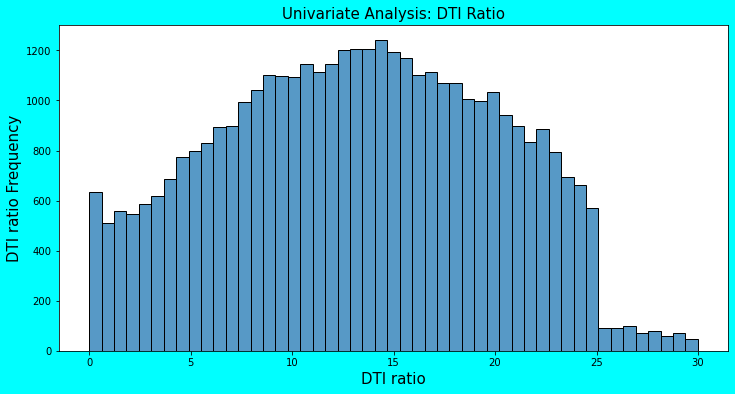

In [226]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: DTI Ratio', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.histplot(x=loan_ds.dti)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('DTI ratio', fontdict=xy_fontdict)
plt.ylabel('DTI ratio Frequency', fontdict=xy_fontdict)
plt.show()

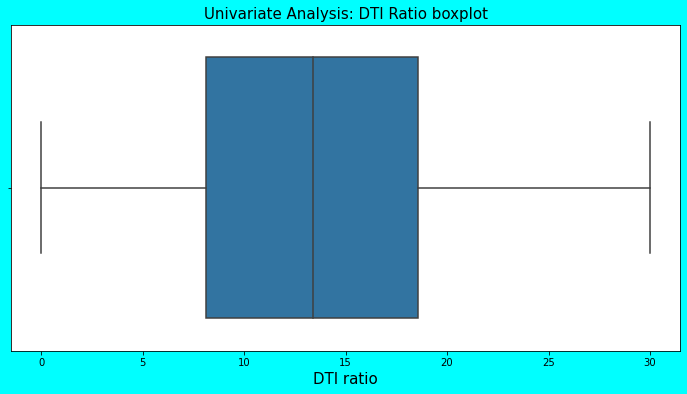

In [227]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: DTI Ratio boxplot', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.boxplot(x=loan_ds.dti)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('DTI ratio', fontdict=xy_fontdict)
plt.show()

In [228]:
loan_ds.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [229]:
loan_ds['dti_buc'] = pd.cut(x= loan_ds.dti, bins=[0,9,14,19,30], labels=['0-9','10-14','15-19','19+'])

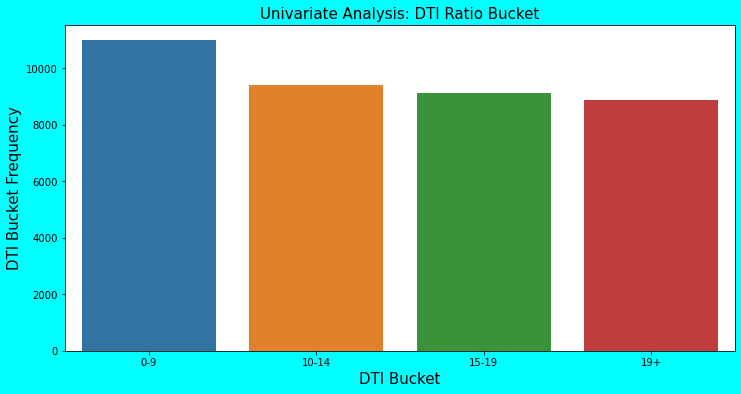

In [230]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: DTI Ratio Bucket', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.dti_buc)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('DTI Bucket', fontdict=xy_fontdict)
plt.ylabel('DTI Bucket Frequency', fontdict=xy_fontdict)
plt.show()

### For graph plotted Inquiry_last_6months:
- As number of inquiry count increases, number of customers applying loan decreases

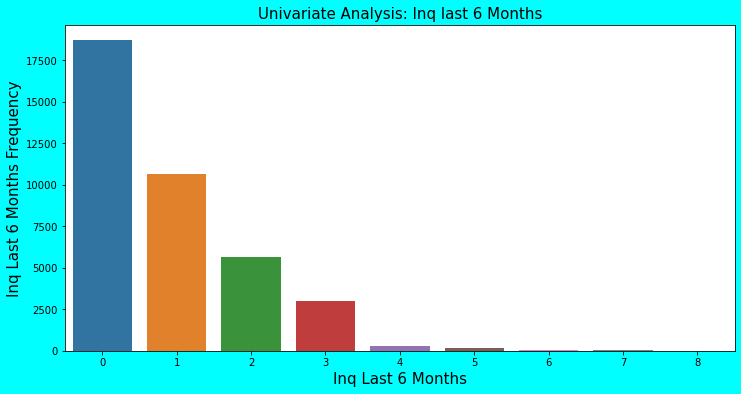

In [231]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Inq last 6 Months', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.inq_last_6mths)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Inq Last 6 Months', fontdict=xy_fontdict)
plt.ylabel('Inq Last 6 Months Frequency', fontdict=xy_fontdict)
plt.show()

### From the below graph for Public record count :
- Most of the customers are having no public derogatory records
- So frequency of those customers for taking loan is high

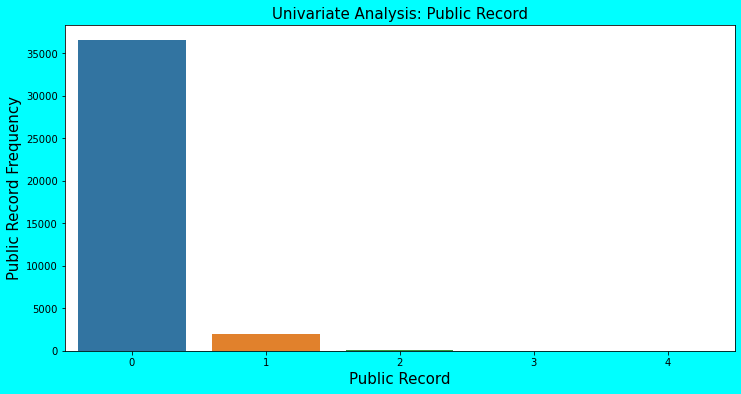

In [232]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Public Record', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.countplot(x=loan_ds.pub_rec)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Public Record', fontdict=xy_fontdict)
plt.ylabel('Public Record Frequency', fontdict=xy_fontdict)
plt.show()

### From the below graph for Public Record Bankruptcies
- Most of the customers have no public record of Bankruptcies.
- Means give loan to them may not lead to any risk.
- We can consider this variable an important one.

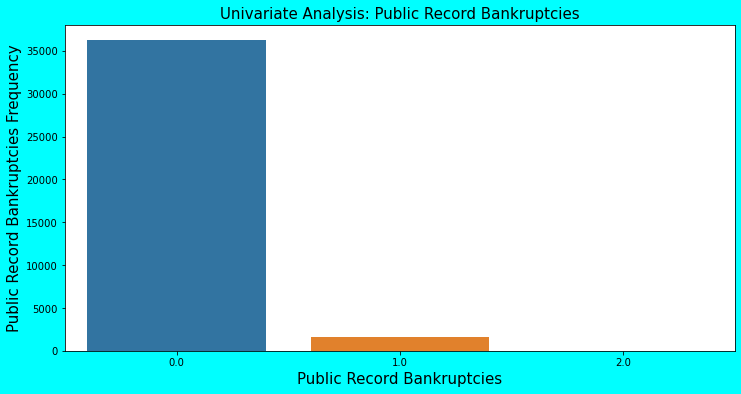

In [233]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Public Record Bankruptcies',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.countplot(x=loan_ds.pub_rec_bankruptcies)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Public Record Bankruptcies', fontdict=xy_fontdict)
plt.ylabel('Public Record Bankruptcies Frequency', fontdict=xy_fontdict)
plt.show()

### We have plotted graph for derived Columns:
- 1) **issued_year**
    - Most of customers took loan in Year 2011
    - Number of customers increases as we move from 2007 to 2011
- 2) **issued_month**
    - Most frequencied months are from **SEP** to **DEC**

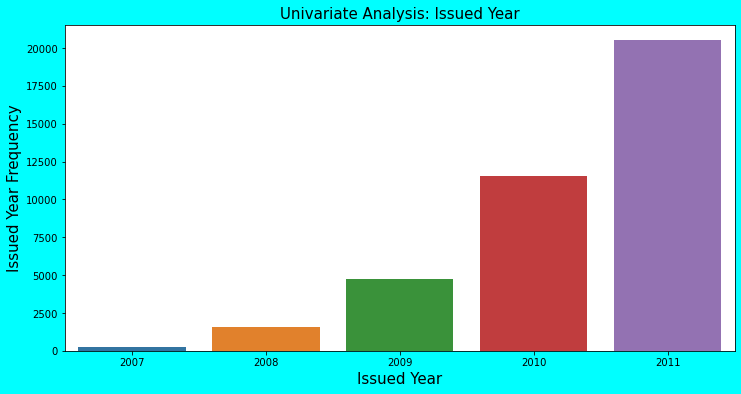

In [234]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Issued Year',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.countplot(x=loan_ds.issued_year)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Issued Year', fontdict=xy_fontdict)
plt.ylabel('Issued Year Frequency', fontdict=xy_fontdict)
plt.show()

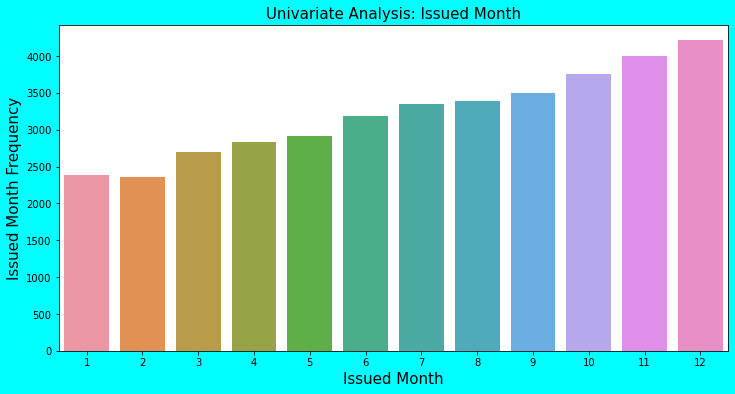

In [235]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Univariate Analysis: Issued Month',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.countplot(x=loan_ds.issued_month)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Issued Month', fontdict=xy_fontdict)
plt.ylabel('Issued Month Frequency', fontdict=xy_fontdict)
plt.show()

## SEGMENTED UNIVARIATE ANALYSIS

### Segmented Univariate Analysis: Loan Amount Bucket and Loan Status

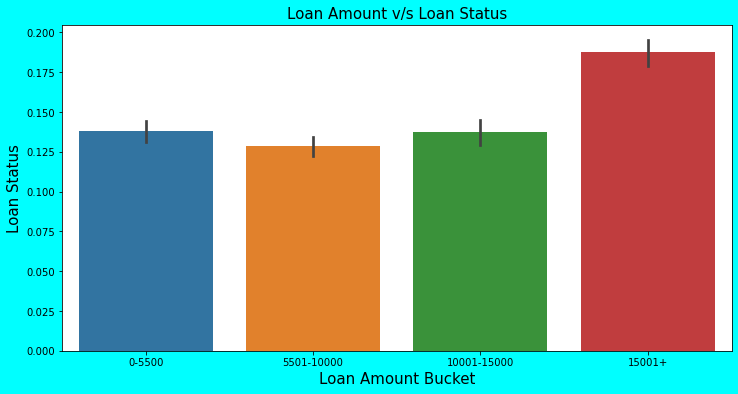

In [236]:
plt.figure(figsize=[12,6], facecolor='Cyan')
plt.title('Loan Amount v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.loan_amnt_buc, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumption:
- Customers apply Maximum loan (>15000), chances to be defaulter is high

### Segmented Univariate Analysis: Term and Loan Status

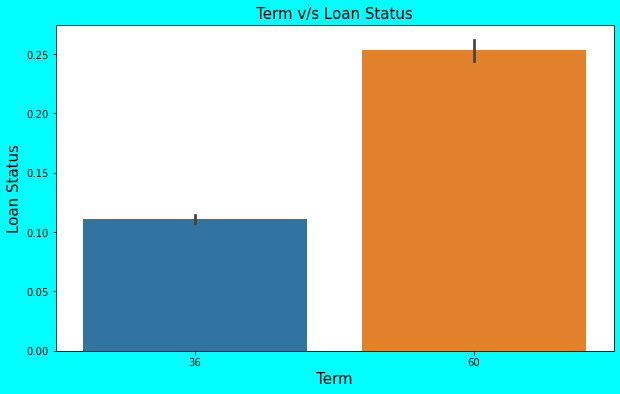

In [237]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Term v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.term, y=loan_ds.loan_status, data=loan_ds)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Term', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- Loan with maximum number of months (60 months) have chances to be defaulter

In [238]:
loan_ds.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

### Segmented Univariate Analysis: Interest Rate Bucket and Loan Status

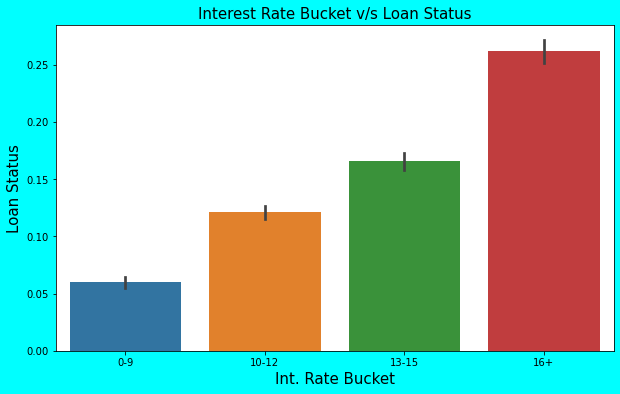

In [239]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Interest Rate Bucket v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.int_rate_buc, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Int. Rate Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- If customers apply loan with high interest rate >15 then chances to be defaulter is high
- Also as we move from bucket (0-9) to (16+) then chances to be defaulter is also increase.

### Segmented Univariate Analysis: Installment Bucket and Loan Status

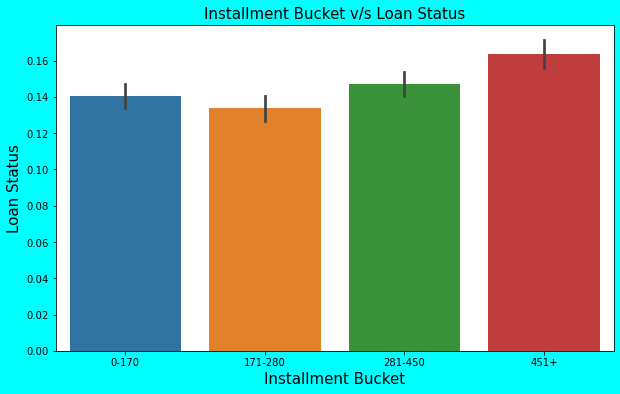

In [240]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Installment Bucket v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.installment_buc, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Installment Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- High installment (451+) causes to become defaulter 
- But it is not much higher to other buckets
- So we can't get much insight from this graph

### Segmented Univariate Analysis: Grade and Loan Status

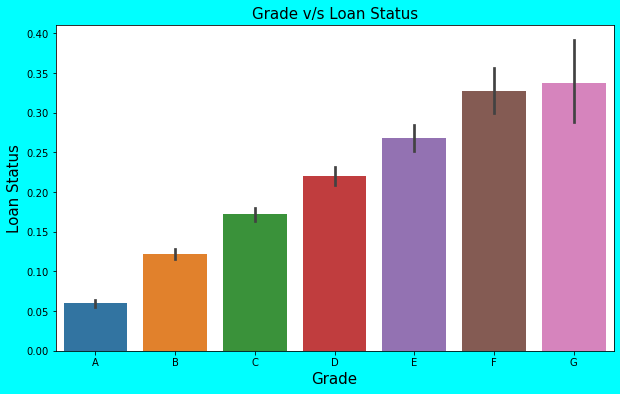

In [241]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Grade v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.grade.sort_values(), y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Grade', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- As we move to lower grade (towards **G**), chances become high to be defaulter

### Segmented Univariate Analysis: Employee Title and Loan Status

In [242]:
top_20_emp_title = (list(loan_ds.emp_title.value_counts().index))[:20]

In [243]:
df2 = loan_ds[loan_ds.emp_title.isin(top_20_emp_title)]

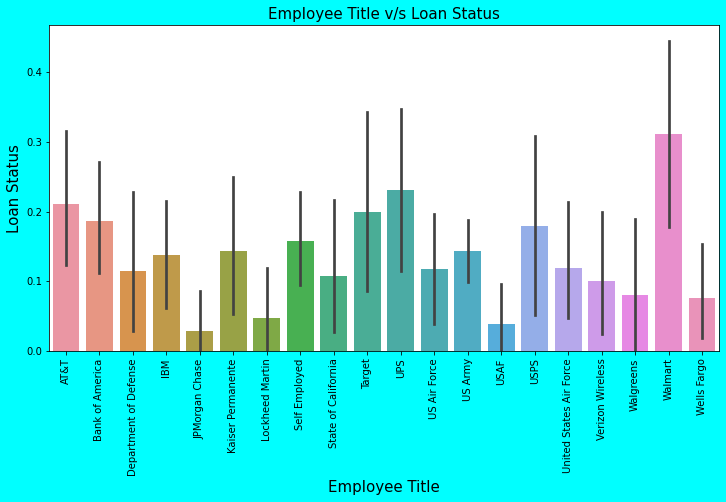

In [244]:
plt.figure(figsize=[12,6], facecolor='Cyan')
plt.title('Employee Title v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=df2.emp_title.sort_values(), y=df2.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Employee Title', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.xticks(rotation = 90)
plt.show()

### Assumptions:
- Not much insight from the above graph
- Employees working in Walmart have more chances to be defaulter

### Segmented Univariate Analysis: Employee Length(Experience) and Loan Status

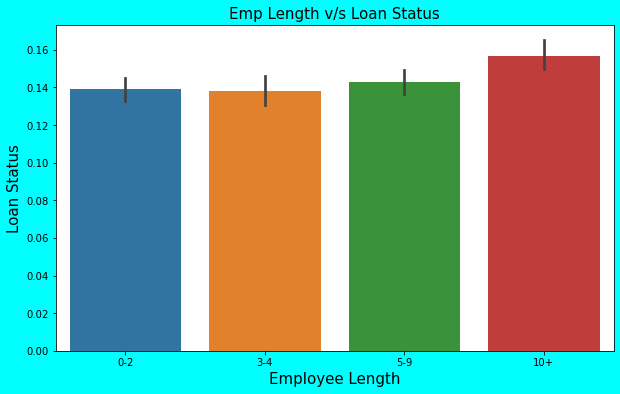

In [245]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Emp Length v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.emp_length_buc.sort_values(), y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Employee Length', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- Almost all categories of Employee Length are same
- So we can't predict much from the graph

### Segmented Univariate Analysis: HomeOwnership and Loan Status

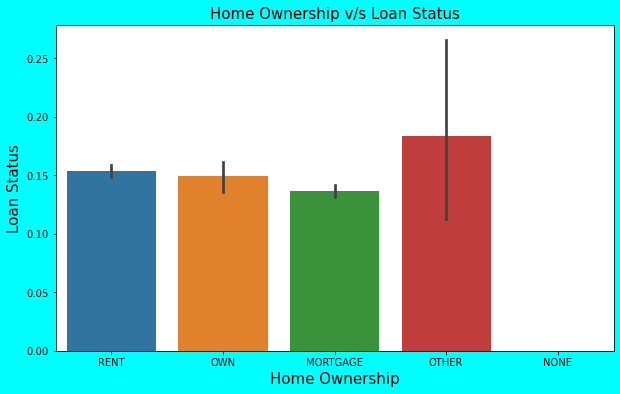

In [246]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Home Ownership v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.home_ownership, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Home Ownership', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- Cusotmers who don't have any of RENTED, OWNED and MORTGAGED house are likely to be defaulter
- Means Bank doesn't have exact information of HomeOwnership for the customers **OTHERS**
- So chances of this category to be defaulter is high

### Segmented Univariate Analysis: Annual Income Bucket and Loan Status

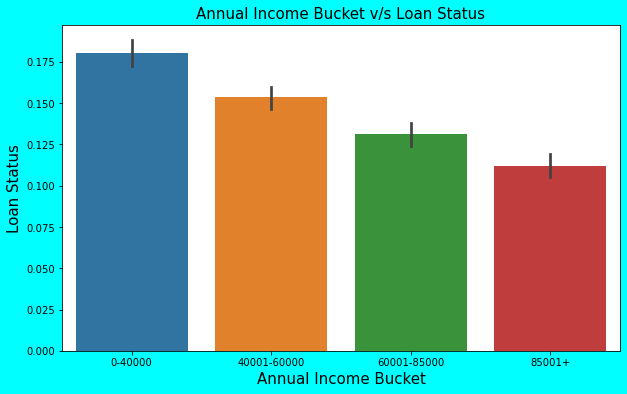

In [247]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Annual Income Bucket v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.annual_inc_buc, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Annual Income Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- Customers who having annual income bucket (upto 40000): more chances to be defaulter
- Also we move from bucket (0-40000) to (85001+), chances to be defaulter decreases

### Segmented Univariate Analysis: Verification Status and Loan Status

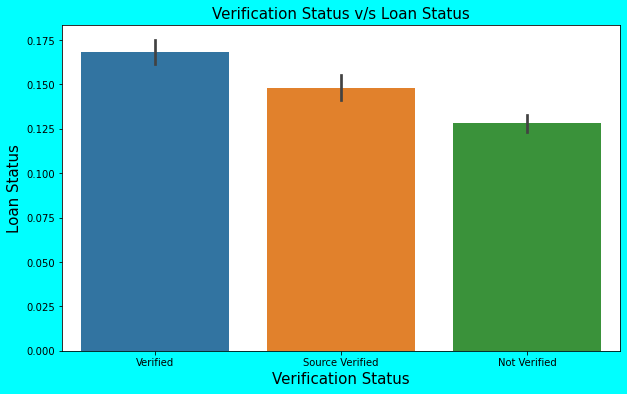

In [248]:
plt.figure(figsize=[10,6], facecolor='Cyan')
plt.title('Verification Status v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.verification_status, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Verification Status', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions:
- As graph shows, verified customers are more likely to be defaulter
    - So we can assume that some of verified customer might given wrong data of their income
- Also we move from Verified to Not Verified, chances to be defaulter decreases
    - Which is not justifiable, but it may be possible

### Segmented Univariate Analysis: Purpose and Loan Status

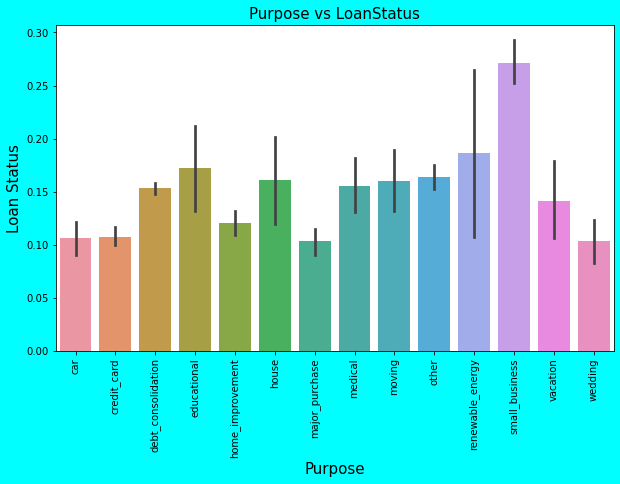

In [249]:
plt.figure(figsize=[10,6],facecolor='Cyan')
plt.title('Purpose vs LoanStatus',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.purpose.sort_values(), y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Purpose', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.xticks(rotation=90)
plt.show()

### Assumptions: 
- Customers who take loan to start their small business have high chances to be defaulter
- Reason might be **unsuccessful/lose** to grow their business

### Segmented Univariate Analysis: DTI Bucket and Loan Status

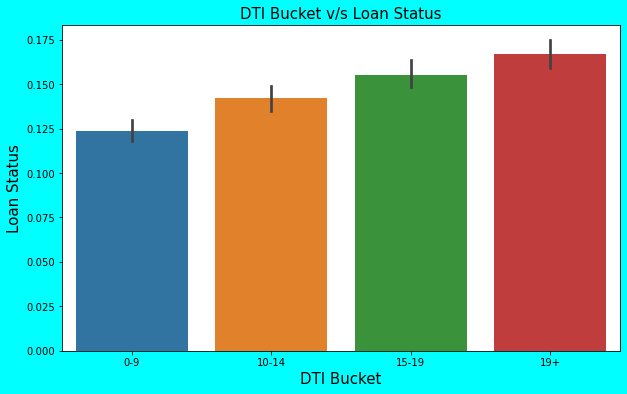

In [250]:
plt.figure(figsize=[10,6],facecolor='Cyan')
plt.title('DTI Bucket v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.dti_buc, y=loan_ds.loan_status, data=loan_ds)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('DTI Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions: 
- As DTI ratio increases, chances to be defaulter increases
- We can say that correlation between DTI bucket and Loan status is +ve 1.

### Segmented Univariate Analysis: PublicRecord and Loan Status

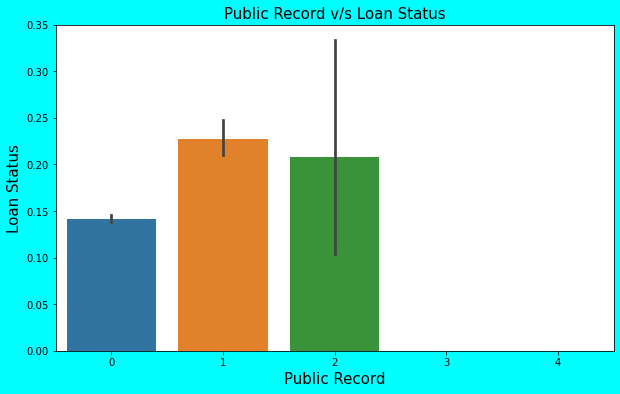

In [251]:
plt.figure(figsize=[10,6],facecolor='Cyan')
plt.title('Public Record v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.pub_rec, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Public Record', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions: 
- Customers having any Public darogatory record 1 or 2 are more likely to be defaulter more as compare to customers without any public darogatory record

### Segmented Univariate Analysis: PublicRecordBankruptcies and Loan Status

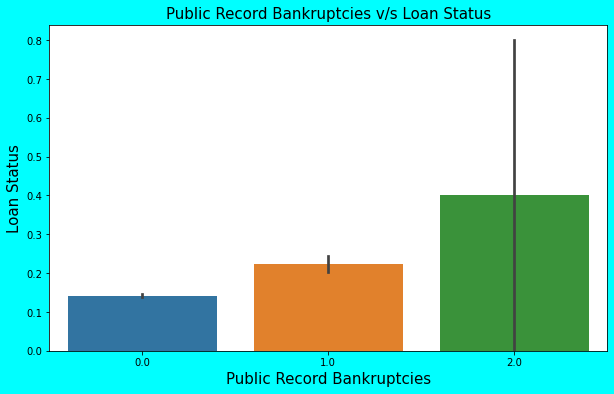

In [252]:
plt.figure(figsize=[10,6],facecolor='Cyan')
plt.title('Public Record Bankruptcies v/s Loan Status',fontdict={'fontsize':15,'fontweight':5,'color':'black'})
sns.barplot(x=loan_ds.pub_rec_bankruptcies, y=loan_ds.loan_status)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Public Record Bankruptcies', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.show()

### Assumptions: 
- As number of records increases for PublicRecordBankruptcies that is 0 to 2, chances to be defaulter increases
- So Loan providing company can deny to give loan to high PublicRecordBankrupt records

## BIVARIATE ANALYSIS

### 1 Bivariate Analysis: Loan amount v/s Interest rate with respect to Loan status


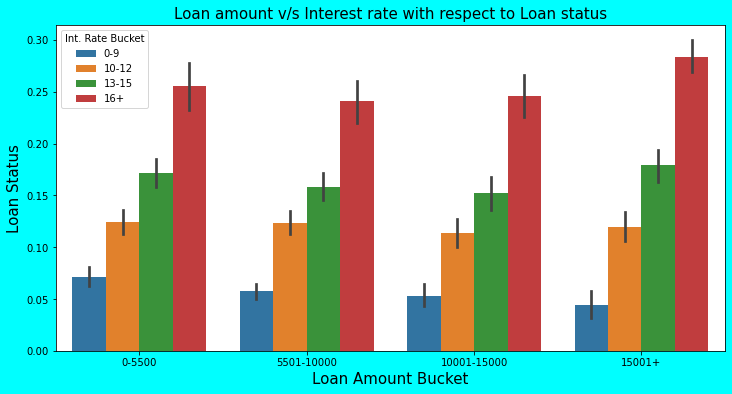

In [253]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Loan amount v/s Interest rate with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='loan_amnt_buc', y='loan_status', hue='int_rate_buc')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Loan Amount Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Int. Rate Bucket')
plt.show()

#### Assumptions: 
- Applicants who receive interest at the rate of 16-25% they have more chance to defaulting in all three categories(Low, Medium and high). 

#### Recommendation: 

- Analysis of Loan amount v/s Interest rate with respect to Loan status - Customers who's borrowing loan more than 16% interest rate whether they are applying loan for amount 5000 or 15000+, there chances to be defaulter high. So our recommendation to bank is, they can provide loan upto 15% interest rate to their customers.

### 2 Bivariate Analysis: Interest rate v/s Term with respect to Loan status

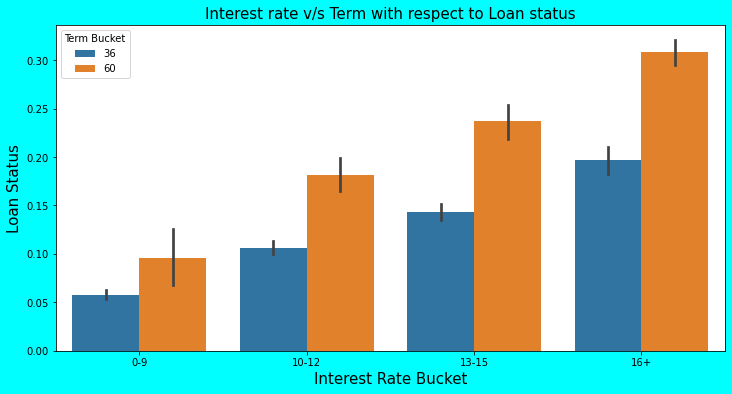

In [254]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Interest rate v/s Term with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='int_rate_buc', y='loan_status', hue='term')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Interest Rate Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Term Bucket')
plt.show()

### Assumptions:
- Applicants who took the loan for higher duration(60 m) with high interest rate(16% - 24%), they have more chance to defaulting with repect to higher interest rate.

#### Recommendation: 

- Analysis of Interest rate v/s Term with respect to Loan status - Customers who's borrowing loan for a longer term that is for 60 months and if we compare it with Interest rate bucket then it is clearly visible that as we are moving from bucket (0-9) to bucket (16+) interest rate, then chances of customers to be defaulter is more  who took loan for longer period. So better to ask customer to apply loan for short period of time with minimum interest rate like upto 12%.

### 3 Bivariate Analysis: Emp length v/s Loan amount with respect to Loan status

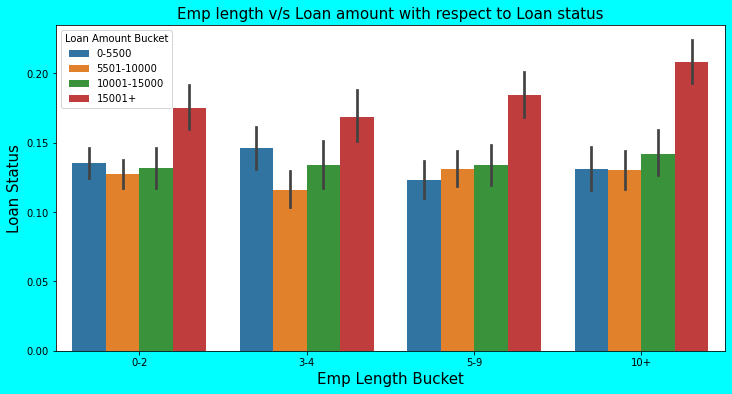

In [255]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Emp length v/s Loan amount with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='emp_length_buc', y='loan_status', hue='loan_amnt_buc')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Emp Length Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Loan Amount Bucket')
plt.show()

### Assumptions:
- Applicant who applied 15000+ loan amount in all emp length they have more chance to be defalter.

#### Recommendation: 

- Analysis of Emp. length v/s Loan amount with respect to Loan status - Customers who's borrowing loan amount more than 15000+ for each category of employee's length(experience), there chances to be defaulter high as compare to other loan amount < 15000. So recommendation to bank, they should try to approve loan request of their customers below 15000.


### 4 Bivariate Analysis: DTI v/s Annual Income with respect to Loan status

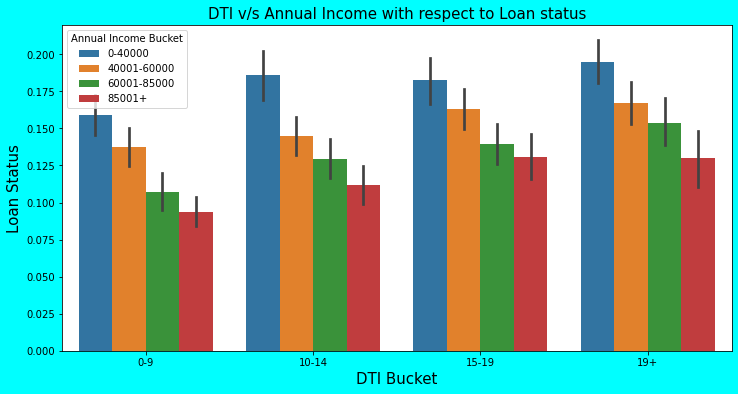

In [256]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('DTI v/s Annual Income with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='dti_buc', y='loan_status', hue='annual_inc_buc')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('DTI Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Annual Income Bucket')
plt.show()

### Assumptions:
- Applicant who's DTI is max and have less annual income, they have more chance to be defaulter.

#### Recommendation: 

- Analysis of DTI v/s Annual Income with respect to Loan status - Customers who's annual income is < 40000 in each DTI ratio bucket, there chances to be defaulter high. Therefore our recommandation to the bank, they should avoid to approve loan request of the customers who's having low annual income < 40000,in whatever dti bucket they come.

### 5 Bivariate Analysis: Annual Income v/s Loan amount with respect to Loan status

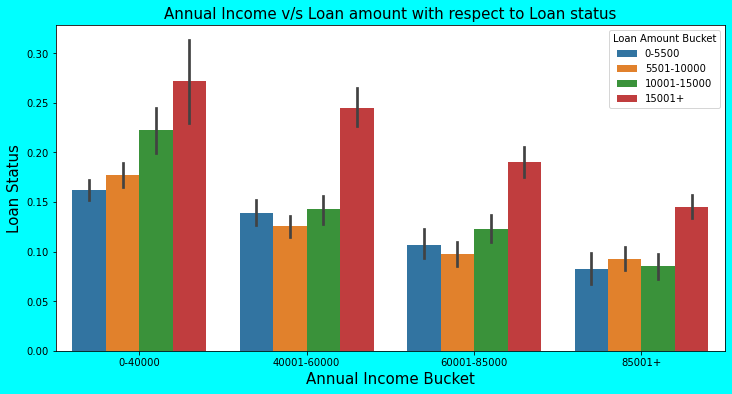

In [257]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Annual Income v/s Loan amount with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='annual_inc_buc', y='loan_status', hue='loan_amnt_buc')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Annual Income Bucket', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Loan Amount Bucket')
plt.show()

### Assumptions:
- Applicants with annual income b/w(0-60000) and applied loan amount more than 15000, they have more chance to be defaulter.

#### Recommendation: 

- Analysis of Annual Income v/s Loan amount  with respect to Loan status - Customers who took loan amount >15000 are more likely to be defaulter for each category of Annual Income bucket, but it is very high for range (<40000) and (40001 to 60000). Therefore our recommendation to bank, they should provide loan amount <15000 to all the customers come under each annual income bucket, If loan amount > 15000 then bank should thoroughly check all the details of the customer before giving loan to them.

### 6 Bivariate Analysis: Purpose v/s Annual Income with respect to Loan status

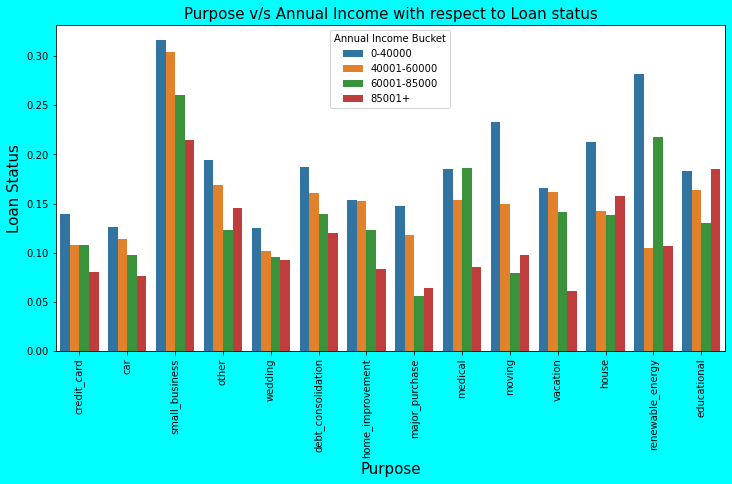

In [258]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Purpose v/s Annual Income with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x= 'purpose', y='loan_status', hue= 'annual_inc_buc', ci=None)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Purpose', fontdict=xy_fontdict)
plt.xticks(rotation=90)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Annual Income Bucket')
plt.show()

### Assumptions:
- Applicant from small_business and applied loan higher amount, there chances to be defaulter high.


#### Recommendation: 

- Analysis of Purpose v/s Loan amount with respect to Loan status - Small Business applicants have high chances to be defaulter. Further customers having annual income upto 40000 apply loan for renewable energy, they also have high chance to be defaulter. Therefore our recommendation to the bank, try to avoid those applicant who's applied loan for small business, renewable energy having annual income below 40000.


### 7 Bivariate Analysis: Public Record Bankruptcies v/s Loan amount with respect to Loan status

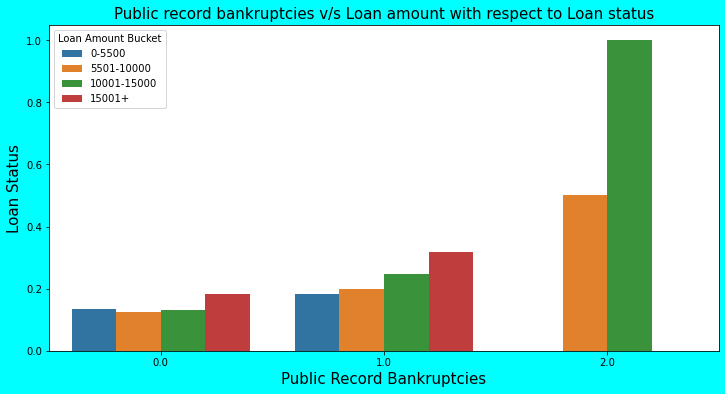

In [259]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Public record bankruptcies v/s Loan amount with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x= 'pub_rec_bankruptcies', y='loan_status', hue= 'loan_amnt_buc', ci=None)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Public Record Bankruptcies', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Loan Amount Bucket')
plt.show()

### Assumptions:
- Applicant who's 'pub_rec_bankruptcies' is higher and applied loan higher amount, there chances to be defaulter high.

#### Recommendation: 

- Analysis of Annual Income v/s Loan amount  with respect to Loan status - For the customers having number of public record bankruptcies are 2 their chances to be defaulter is very high if they apply loan amount more than 10000 and if number of records are equal to 1 then their might chance to be defaulter for loan amount > 10000.Therefore our recommendation to the bank, they should completely deny the customers apply loan amount > 10000 and having public record bankruptcies 2 and for 1 bank should avoid to approve loan amount > 10000.


In [260]:
loan_ds = loan_ds[loan_ds.home_ownership.isin(['RENT','OWN','MORTGAGE'])]

### 8 Bivariate Analysis: Home ownership v/s term with respect to Loan status


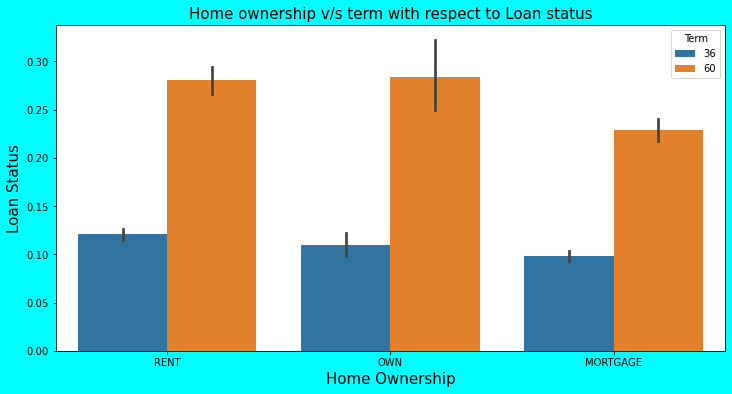

In [261]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Home ownership v/s term with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
sns.barplot(data=loan_ds, x='home_ownership', y='loan_status', hue='term')
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Home Ownership', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Term')
plt.show()

### Assumptions:
- Applicant type rent and own are applied loan for long duration, there chances to be defaulter high.

#### Recommendation: 

- Analysis of Emp. length v/s Loan amount with respect to Loan status - Customers who come under Rent, Own, Mortgage category are applied loan for longer term, their chances to be defaulter high. So our recommendation for bank, to insist their customers take loan for short duration whether they come under any category of home-ownership.

### 9 Bivariate Analysis: Grade vs Loan amount with respect to Loan status 


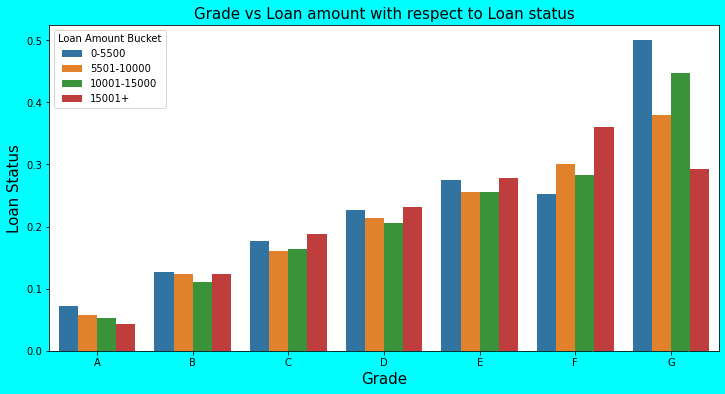

In [262]:
plt.figure(figsize=(12,6), facecolor='Cyan')
plt.title('Grade vs Loan amount with respect to Loan status',
          fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'black'})
plot_order = order=['A','B','C','D','E','F','G']
sns.barplot(data=loan_ds, x='grade', y='loan_status', hue='loan_amnt_buc', order=plot_order, ci= None)
xy_fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'}
plt.xlabel('Grade', fontdict=xy_fontdict)
plt.ylabel('Loan Status', fontdict=xy_fontdict)
plt.legend(title='Loan Amount Bucket')
plt.show()

### Assumptions:
- Applicant grade 'G' has most chance to be defaulter.

#### Recommendation: 

- Analysis of Emp. length v/s Loan amount with respect to Loan status - Customers having grade D and below towards G are more likely to be defaulter, whatever loan amount they apply and it is getting worst moving towards grade F and G. So our recommendation to bank, they should check all the necessary details required before approve the loan amount for Grade D to G and need to check proper documents to approve loan for grade F and G.